In [188]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
import numpy as np

In [189]:
dataTrain = pd.read_csv("train.csv")
dataTrain["type_of_meal_plan_dummy"] = pd.factorize(dataTrain["type_of_meal_plan"])[0]
dataTrain["room_type_reserved_dummy"] = pd.factorize(dataTrain["room_type_reserved"])[0]
dataTrain["market_segment_type_dummy"] = pd.factorize(dataTrain["market_segment_type"])[0]
dataTrain

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,type_of_meal_plan_dummy,room_type_reserved_dummy,market_segment_type_dummy
0,INN06611,1,0,1,1,Meal Plan 2,0,Room_Type 1,247,2018,...,Offline,0,0,0,90.00,0,Not_Canceled,0,0,0
1,INN28944,2,0,0,3,Meal Plan 1,0,Room_Type 4,48,2018,...,Online,0,0,0,98.87,2,Not_Canceled,1,1,1
2,INN21921,2,0,1,5,Meal Plan 1,0,Room_Type 4,124,2018,...,Online,0,0,0,143.10,0,Canceled,1,1,1
3,INN12669,1,0,0,2,Meal Plan 1,1,Room_Type 1,37,2017,...,Online,0,0,0,85.50,0,Not_Canceled,1,0,1
4,INN30837,3,0,1,3,Meal Plan 1,0,Room_Type 4,73,2018,...,Online,0,0,0,150.30,2,Not_Canceled,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29015,INN33051,1,0,0,2,Not Selected,0,Room_Type 1,0,2018,...,Online,0,0,0,129.00,1,Not_Canceled,2,0,1
29016,INN05227,2,0,2,3,Meal Plan 1,0,Room_Type 1,192,2017,...,Online,0,0,0,19.15,0,Canceled,1,0,1
29017,INN07121,2,0,0,2,Meal Plan 1,0,Room_Type 1,86,2017,...,Offline,0,0,0,105.00,0,Not_Canceled,1,0,0
29018,INN05085,2,0,2,2,Meal Plan 1,0,Room_Type 1,119,2018,...,Online,0,0,0,88.73,1,Not_Canceled,1,0,1


In [190]:
X = dataTrain.drop(["Booking_ID","type_of_meal_plan","room_type_reserved","market_segment_type","booking_status","arrival_year","arrival_date"], axis=1)
y = dataTrain["booking_status"]

In [191]:
X

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_month,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_dummy,room_type_reserved_dummy,market_segment_type_dummy
0,1,0,1,1,0,247,6,0,0,0,90.00,0,0,0,0
1,2,0,0,3,0,48,6,0,0,0,98.87,2,1,1,1
2,2,0,1,5,0,124,9,0,0,0,143.10,0,1,1,1
3,1,0,0,2,1,37,9,0,0,0,85.50,0,1,0,1
4,3,0,1,3,0,73,7,0,0,0,150.30,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29015,1,0,0,2,0,0,6,0,0,0,129.00,1,2,0,1
29016,2,0,2,3,0,192,9,0,0,0,19.15,0,1,0,1
29017,2,0,0,2,0,86,9,0,0,0,105.00,0,1,0,0
29018,2,0,2,2,0,119,8,0,0,0,88.73,1,1,0,1


In [192]:
y

0        Not_Canceled
1        Not_Canceled
2            Canceled
3        Not_Canceled
4        Not_Canceled
             ...     
29015    Not_Canceled
29016        Canceled
29017    Not_Canceled
29018    Not_Canceled
29019    Not_Canceled
Name: booking_status, Length: 29020, dtype: object

In [193]:
# logistic regression
model1 = LogisticRegression(max_iter = 10000,random_state=0)
m1 = model1.fit(X,y)
y_pred = m1.predict(X)
acc = accuracy_score(y, y_pred)
print("Accuracy:", acc)

Accuracy: 0.7910062026188835


In [194]:
# RBF SVM
model2 = SVC(gamma=2, C=1,random_state=0)
m2 = model2.fit(X,y)
y_pred = m2.predict(X)
acc = accuracy_score(y, y_pred)
print("Accuracy:", acc)

Accuracy: 0.993039283252929


In [195]:
# Random forest 
model3 = RandomForestClassifier(max_depth=25, n_estimators=10, max_features=20,random_state=0)
m3 = model3.fit(X,y)
y_pred = m3.predict(X)
acc = accuracy_score(y, y_pred)
print("Accuracy:", acc)

Accuracy: 0.9850447966919366


In [196]:
# ensemble classifier with all three
# Initialize the voting classifier
ensemble = VotingClassifier(estimators=[('lr', model1), ('svc', model2), ('rf', model3)])

# Train the voting classifier on the training set
ensemble.fit(X, y)

# Make predictions on the test set
y_pred = ensemble.predict(X)

# Calculate the accuracy score
accuracy_a = accuracy_score(y, y_pred)

print("Accuracy:", accuracy_a)

Accuracy: 0.9873535492763611


In [197]:
dataTest = pd.read_csv("test.csv")
dataTest["type_of_meal_plan_dummy"] = pd.factorize(dataTest["type_of_meal_plan"])[0]
dataTest["room_type_reserved_dummy"] = pd.factorize(dataTest["room_type_reserved"])[0]
dataTest["market_segment_type_dummy"] = pd.factorize(dataTest["market_segment_type"])[0]
dataTest

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,type_of_meal_plan_dummy,room_type_reserved_dummy,market_segment_type_dummy
0,INN12638,1,0,2,4,Meal Plan 1,0,Room_Type 1,245,2018,...,Offline,0,0,0,110.00,0,Canceled,0,0,0
1,INN35566,2,0,3,5,Meal Plan 1,0,Room_Type 1,160,2018,...,Online,0,0,0,71.60,0,Canceled,0,0,1
2,INN05586,2,0,1,1,Not Selected,0,Room_Type 1,151,2018,...,Online,0,0,0,103.50,0,Canceled,1,0,1
3,INN16848,2,0,0,2,Meal Plan 2,0,Room_Type 1,74,2017,...,Offline,0,0,0,109.00,0,Not_Canceled,2,0,0
4,INN23041,2,0,0,2,Meal Plan 2,0,Room_Type 1,102,2017,...,Offline,0,0,0,109.00,0,Not_Canceled,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7250,INN24049,3,0,0,2,Meal Plan 1,0,Room_Type 7,3,2018,...,Online,0,0,0,185.57,0,Not_Canceled,0,4,1
7251,INN04482,2,0,0,4,Meal Plan 1,0,Room_Type 1,156,2018,...,Online,0,0,0,99.45,0,Canceled,0,0,1
7252,INN25211,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,...,Offline,0,0,0,130.00,0,Canceled,0,0,0
7253,INN13598,2,0,0,3,Meal Plan 1,0,Room_Type 1,213,2018,...,Offline,0,0,0,130.00,0,Canceled,0,0,0


In [198]:
X_test = dataTest.drop(["Booking_ID","type_of_meal_plan","room_type_reserved","market_segment_type","booking_status","arrival_year","arrival_date"], axis=1)
y_test = dataTest["booking_status"]

In [200]:
y_pred = m1.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.7811164713990352


In [201]:
y_pred = m2.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.662026188835286


In [212]:
y_pred = m3.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.878566505858029


In [203]:
# Make predictions on the test set
y_pred_ea = ensemble.predict(X_test)

# Calculate the accuracy score
accuracy_ea = accuracy_score(y_test, y_pred_ea)

print("Accuracy:", accuracy_ea)

Accuracy: 0.8038594073053067


In [204]:
pd.Series(y_pred_ea).to_csv('pred.csv', index=False, header=False)
pd.Series(accuracy_a).to_csv("a.csv", index=False, header=False)
pd.Series(accuracy_ea).to_csv("ea.csv", index=False, header=False)

<AxesSubplot: >

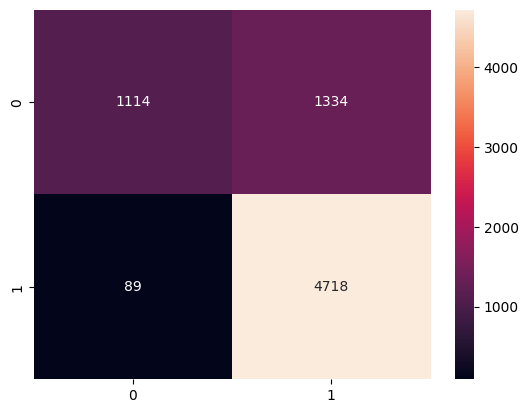

In [205]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_ea)

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d')